# Predict Chocolate Makers Location with Deep Learning Model with H2O

## Project Choice #2

http://coursera.h2o.ai/cacao.882.csv

This is a classification problem. You have to predict "Maker Location" (notice the space). In other words, using the rating, and the other fields, how accurately can you identify if it is Belgian chocolate, French chocolate, and so on.

You should split the data into train, valid and test. Use a seed (of your choice) to make your experiments more reproducible. Alternatively, you can split into just train and test, and then use cross-validation.

## Step 1

In [1]:
## Step one is to start h2o, load your data set, and split it if necessary. By the end of this stage you should have 
## three variables, pointing to three data frames on h2o: train, valid, test. However, if you are choosing to use 
## cross-validation, you will only have two: train and test.

In [2]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('http://coursera.h2o.ai/cacao.882.csv')
print(df.shape)
df.head()

(1795, 9)


,Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico' 'Switzerland' 'Netherlands'
 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'U.K.' 'Australia' 'Wales'
 'Belgium' 'Germany' 'Russia' 'Puerto Rico' 'Venezuela' 'Colombia' 'Japan'
 'New Zealand' 'Costa Rica' 'South Korea' 'Amsterdam' 'Scotland'
 'Martinique' 'Sao Tome' 'Argentina' 'Guatemala' 'South Africa' 'Bolivia'
 'St. Lucia' 'Portugal' 'Singapore' 'Denmark' 'Vietnam' 'Grenada' 'Israel'
 'India' 'Czech Republic' 'Domincan Republic' 'Finland' 'Madagascar'
 'Philippines' 'Sweden' 'Poland' 'Austria' 'Honduras' 'Nicaragua'
 'Lithuania' 'Niacragua' 'Chile' 'Ghana' 'Iceland' 'Eucador' 'Hungary'
 'Suriname' 'Ireland']
60
U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary     

<AxesSubplot:>

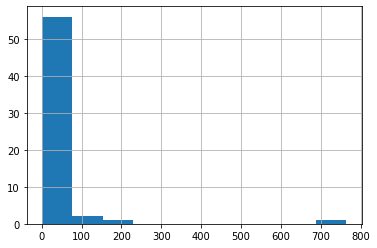

In [4]:
#df.dtypes
print(df['Maker Location'].unique())
print(len(df['Maker Location'].unique()))
loc_table = df['Maker Location'].value_counts()
print(loc_table)
loc_table.hist()

As can be seen from the above table, some of the locations have too few records, which will result in poor accuracy of the model to be learnt on after splitting the dataset into train, validation and test datasets. Let's get rid of the locations that have small number of (< 40) examples in the dataset, to make the results more easily comprehendable, by reducing number of categories in the output variable.

In [5]:
## filter out the countries for which there is < 40 examples present in the dataset
loc_gt_40_recs = loc_table[loc_table >= 40].index.tolist()
df_sub = df[df['Maker Location'].isin(loc_gt_40_recs)]

In [6]:
h2o.init() # h2o.clusterStatus()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 59 mins
H2O cluster version:,3.13.0.3978
H2O cluster version age:,4 years and 10 days !!!
H2O cluster name:,H2O_started_from_R_Sandipan.Dey_tlu199
H2O cluster total nodes:,1
H2O cluster free memory:,2.897 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
h2o_df = h2o.H2OFrame(df_sub.values, destination_frame = "cacao_882", 
                      column_names=[x.replace(' ', '_') for x in df.columns.tolist()])
#h2o_df.head()
#h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
df_cacao_882 = h2o.get_frame('cacao_882') # df_cacao_882.as_data_frame()
#df_cacao_882.head()
df_cacao_882.describe()

Rows:1347
Cols:9




,Maker,Origin,REF,Review_Date,Cocoa_Percent,Maker_Location,Rating,Bean_Type,Bean_Origin
type,enum,enum,int,int,enum,enum,real,enum,enum
mins,,,5.0,2006.0,,,1.0,,
mean,,,1025.8849294729039,2012.273942093541,,,3.1818856718633928,,
maxs,,,1952.0,2017.0,,,5.0,,
sigma,,,553.7812013716441,2.978615633185091,,,0.4911459825968248,,
zeros,,,0,0,,,0,,
missing,0,0,0,0,0,0,0,0,0
0,A. Morin,Agua Grande,1876.0,2016.0,63%,France,3.75,<0xA0>,Sao Tome
1,A. Morin,Kpime,1676.0,2015.0,70%,France,2.75,<0xA0>,Togo
2,A. Morin,Atsane,1676.0,2015.0,70%,France,3.0,<0xA0>,Togo


In [9]:
df_cacao_882['Maker_Location'].table()

Maker_Location,Count
Australia,49
Belgium,40
Canada,125
Ecuador,54
France,156
Italy,63
U.K.,96
U.S.A.,764


In [27]:
train, valid, test = df_cacao_882.split_frame(ratios = [0.8, 0.1], 
                                              destination_frames = ['train', 'valid', 'test'], 
                                              seed = 321)

In [28]:
print("%d/%d/%d" %(train.nrows, valid.nrows, test.nrows))

1082/138/127


## Step 2

In [29]:
## Step two is to set x to be the list of columns you will use to train on, to be the column you will learn. Your choice of 
## y decides if it will be a classification or a regression.

In [30]:
ignore_fields = ['Review_Date', 'Bean_Type', 'Maker_Location']

In [31]:
# Specify the response and predictor columns
y = 'Maker_Location' # multinomial Classification
x = [i for i in train.names if not i in ignore_fields]

## Step 3

In [32]:
## Step three is to create a baseline deep learning model. It is recommended to use all default settings (remembering to 
## specify either nfolds or validation_frame); if you want to use different settings you should include a comment in your 
## source file justifying this. Allowable reasons are that the default settings were taking too long on your hardware, or 
## that they were over-fitting. Your script must include timing code.

In [33]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

model = H2ODeepLearningEstimator(seed=321, reproducible=True) 

%time model.train(x = x, y = y, training_frame = train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 15.7 s


In [34]:
model.model_performance(train).mean_per_class_error()

0.00020161290322580645

In [35]:
model.model_performance(valid).mean_per_class_error()

0.18289141414141413

In [36]:
perf_test = model.model_performance(test)

In [37]:
print('Mean class error', perf_test.mean_per_class_error())
print('log loss', perf_test.logloss())
print('MSE', perf_test.mse())
print('RMSE', perf_test.rmse())

Mean class error 0.1516731507928691
log loss 0.34992752504372965
MSE 0.08433363535920778
RMSE 0.29040254020791173


In [38]:
perf_test.hit_ratio_table()

Top-8 Hit Ratios: 


k,hit_ratio
1,0.8976378
2,0.9606299
3,0.9685040
4,0.9763780
5,1.0
6,1.0
7,1.0
8,1.0


In [39]:
perf_test.confusion_matrix().as_data_frame()

,Australia,Belgium,Canada,Ecuador,France,Italy,U.K.,U.S.A.,Error,Rate
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.200000,1 / 5
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 3
2,0.0,0.0,11.0,0.0,0.0,0.0,0.0,2.0,0.153846,2 / 13
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.000000,0 / 3
4,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.090909,1 / 11
5,0.0,0.0,0.0,0.0,2.0,7.0,0.0,1.0,0.300000,3 / 10
6,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.454545,5 / 11
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,70.0,0.014085,1 / 71
8,4.0,3.0,11.0,3.0,13.0,7.0,6.0,80.0,0.102362,13 / 127


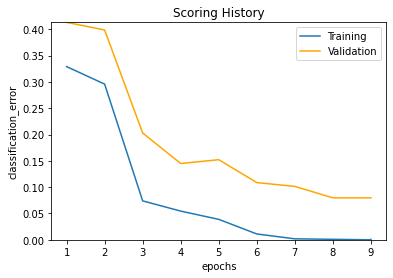

In [40]:
model.plot()

## Step 4

In [28]:
## Step four is to produce a tuned model, that gives superior performance. However you should use no more than 10 times 
## the running time of your baseline model, so again your script should be timing the model.

In [41]:
model_tuned = H2ODeepLearningEstimator(epochs=200, 
                                       distribution="multinomial",
                                       activation="RectifierWithDropout",
                                       stopping_rounds=5, 
                                       stopping_tolerance=0, 
                                       stopping_metric="logloss",
                                       input_dropout_ratio=0.2,
                                       l1=1e-5,
                                       hidden=[200,200,200],
                                      seed=321,
                                      reproducible=True)
%time model_tuned.train(x, y, training_frame = train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1min 23s


In [42]:
model_tuned.model_performance(train).mean_per_class_error()

0.0

In [43]:
model_tuned.model_performance(valid).mean_per_class_error()

0.07696485401964853

In [44]:
perf_test = model_tuned.model_performance(test)
print('Mean class error', perf_test.mean_per_class_error())
print('log loss', perf_test.logloss())
print('MSE', perf_test.mse())
print('RMSE', perf_test.rmse())

Mean class error 0.11212121212121212
log loss 0.17093351194458314
MSE 0.04538028467085852
RMSE 0.21302648819069078


In [45]:
perf_test.hit_ratio_table()

Top-8 Hit Ratios: 


k,hit_ratio
1,0.9448819
2,0.9763780
3,0.984252
4,0.992126
5,1.0
6,1.0
7,1.0
8,1.0


In [46]:
perf_test.confusion_matrix().as_data_frame()

,Australia,Belgium,Canada,Ecuador,France,Italy,U.K.,U.S.A.,Error,Rate
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 5
1,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,1 / 3
2,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 13
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.000000,0 / 3
4,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.090909,1 / 11
5,0.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,0.200000,2 / 10
6,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.272727,3 / 11
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.000000,0 / 71
8,5.0,2.0,13.0,4.0,11.0,8.0,8.0,76.0,0.055118,7 / 127


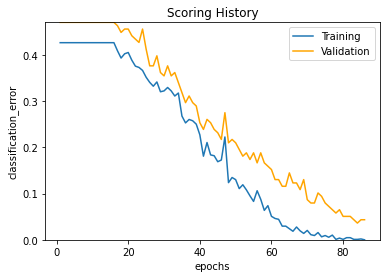

In [47]:
model_tuned.plot()

As can be seen from the above plot, the early-stopping stopped the model to overfit and the model achieves better accruacy on the test dataset.

## Step 5

In [48]:
# Step five is to save both your models, to your local disk, and they should be submitted with your script. 
# Use saveModel() (in R) or save_model() (Python), to export the binary version of the model. (Do not export a POJO.)

In [49]:
h2o.save_model(model, 'base_model')
h2o.save_model(model_tuned, 'tuned_model')

'C:\\courses\\coursera\\H2O\\Week2\\tuned_model\\DeepLearning_model_python_1628936868218_4'